#### Importing Libraries

In [1]:
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd
import xlrd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sb

# Preprocessing
from sklearn.preprocessing import OneHotEncoder

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier, Pool, cv

# Let's ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
emp=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [3]:
#display the basic information of the dataframe
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [4]:
#drop the EmpNumber from the data as it will not give us any insight and wont help our algorithms
emp=emp.drop('EmpNumber',axis=1)

In [5]:
emp.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [6]:
#checking for any missing values in the data
emp.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [7]:
#making a copy of the dataframe as backup
emp1=emp.copy()

In [8]:
#making a list of character datatype columns
cat_cols=emp.select_dtypes(include=['object']).columns.tolist()

In [9]:
cat_cols

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [10]:
num_cols=emp1.drop(cat_cols,axis=1).columns.tolist()

In [11]:
num_cols

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [12]:
num_cols.remove('PerformanceRating')

In [13]:
emp.shape

(1200, 27)




## Visualizing the features in the dataframe

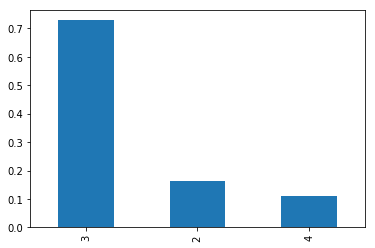

In [14]:
#exploring the target column
#normalizing the no.of employees for each rating in percentages with the help of normalize option
emp.PerformanceRating.value_counts(normalize=True).plot(kind='bar')

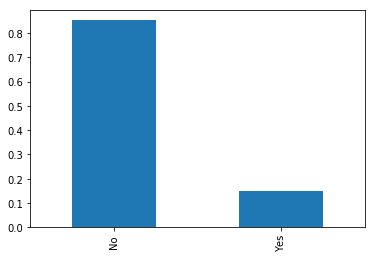

In [15]:
#plotting attrition 
emp.Attrition.value_counts(normalize=True).plot(kind='bar')

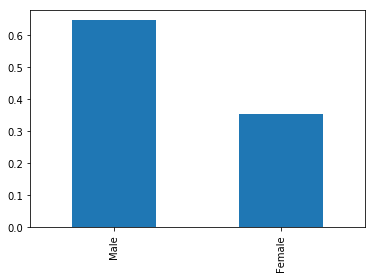

In [16]:
#plotting gender-wise attrition
emp.Gender[(emp.Attrition=='Yes')].value_counts(normalize=True).plot(kind='bar')

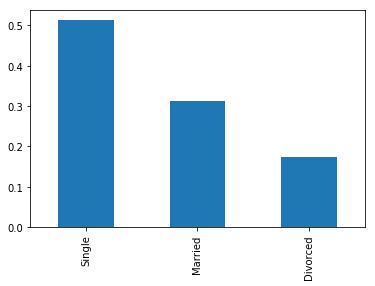

In [17]:
#plotting attrition among male employees based on their marital status
emp.MaritalStatus[(emp.Attrition=='Yes') & (emp.Gender=='Male')].value_counts(normalize=True).plot(kind='bar')

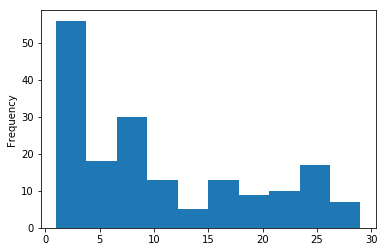

In [18]:
#visualizing attrition based on distance from home
emp.DistanceFromHome[(emp.Attrition=='Yes')].plot(kind='hist')





### Department Wise Analysis

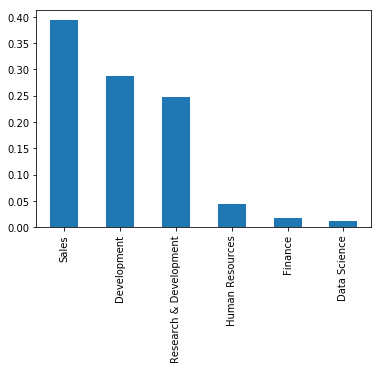

In [19]:
# Department wise analysis of attrition in percentages
emp.EmpDepartment[emp.Attrition=="Yes"].value_counts(normalize=True).plot(kind='bar')

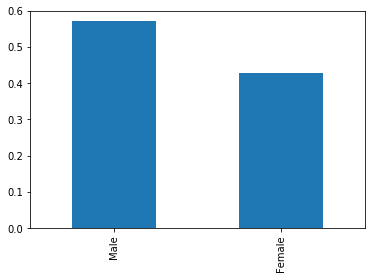

In [40]:
#plotting attrition for Sales department gender wise
emp.Gender[(emp.Attrition=='Yes') & (emp.EmpDepartment=='Sales')].value_counts(normalize=True).plot(kind='bar')

In [20]:
#replacing OverTime values to 1 and 0 for Yes and No respectively. This is done so that we can plot OverTime
emp['OverTime1']=emp.OverTime.replace({'Yes':1,'No':0})

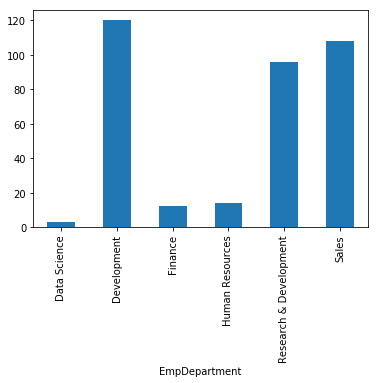

In [35]:
#visualizing department wise OverTime
emp[emp.OverTime1==1].groupby('EmpDepartment')['OverTime1'].count().plot(kind='bar')

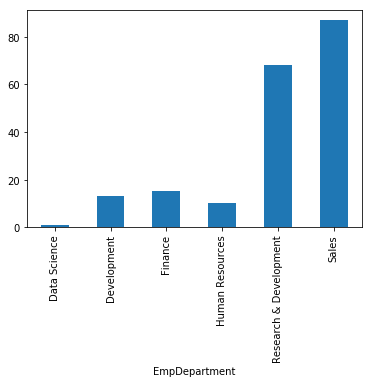

In [41]:
#plotting department wise lowest performing employee counts
emp[emp.PerformanceRating==2].groupby('EmpDepartment')['PerformanceRating'].count().plot(kind='bar')

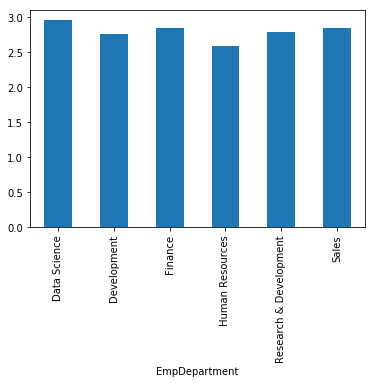

In [42]:
#plotting department wise training times
emp.groupby('EmpDepartment')['TrainingTimesLastYear'].mean().plot(kind='bar')


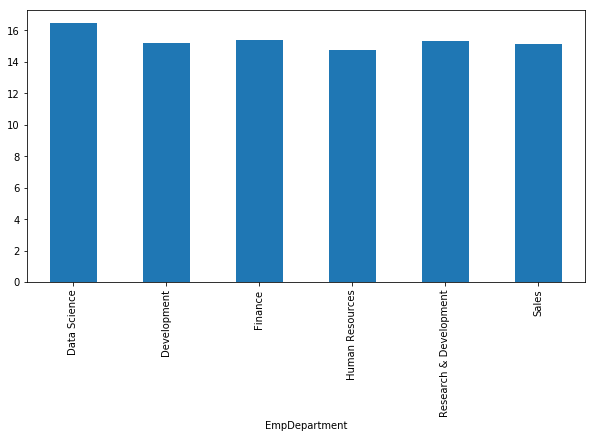

In [86]:
#checking the average EmpLastSalaryHikePercent department wise
emp.groupby('EmpDepartment')['EmpLastSalaryHikePercent'].mean().plot(kind='bar',figsize=(10,5))

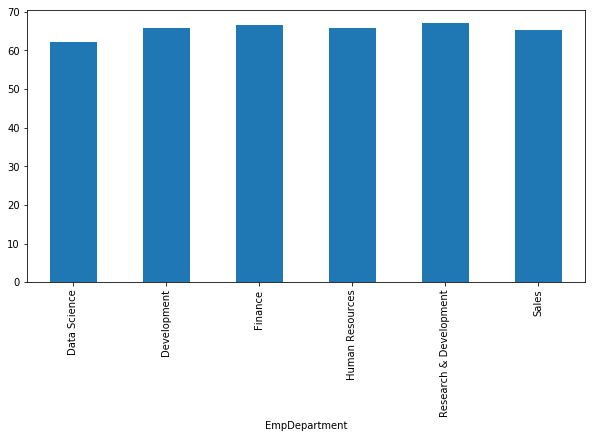

In [39]:
#checking the average EmpHourlyRate department wise
emp.groupby('EmpDepartment')['EmpHourlyRate'].mean().plot(kind='bar',figsize=(10,5))

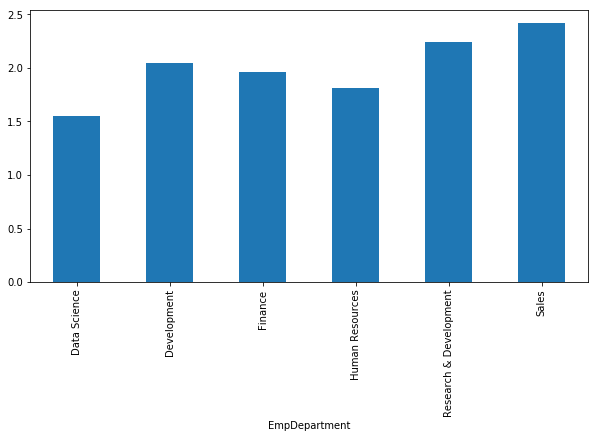

In [38]:
#checking the average YearsSinceLastPromotion department wise
emp.groupby('EmpDepartment')['YearsSinceLastPromotion'].mean().plot(kind='bar',figsize=(10,5))


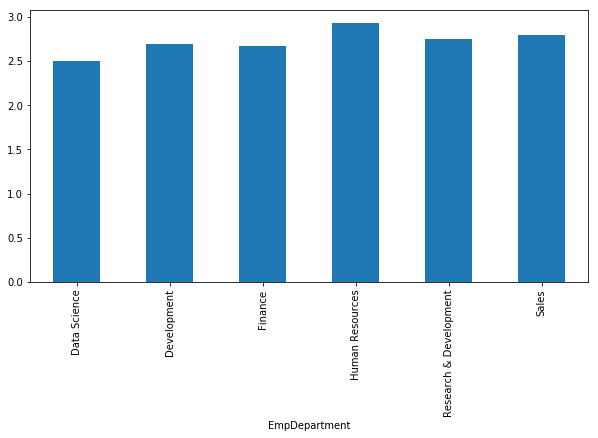

In [37]:
#checking the average EmpWorkLifeBalance department wise
emp.groupby('EmpDepartment')['EmpWorkLifeBalance'].mean().plot(kind='bar',figsize=(10,5))


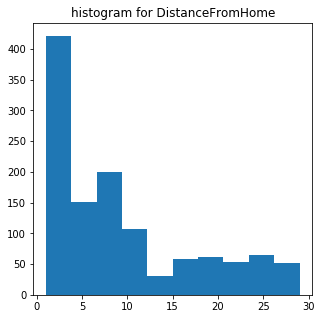

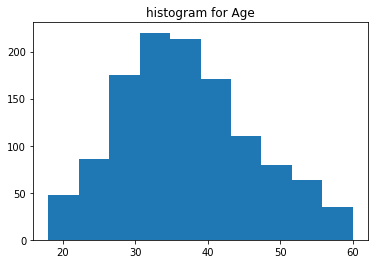

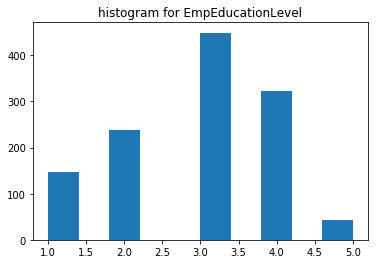

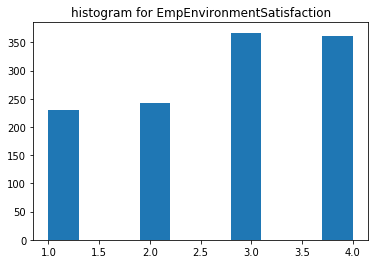

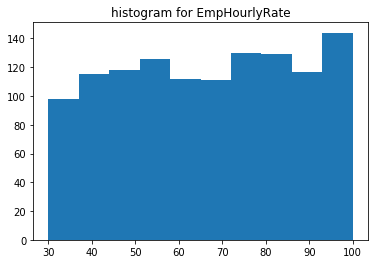

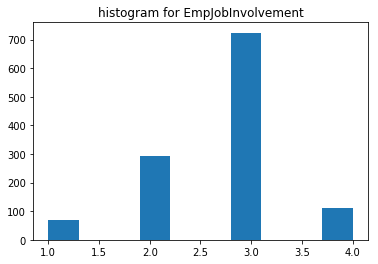

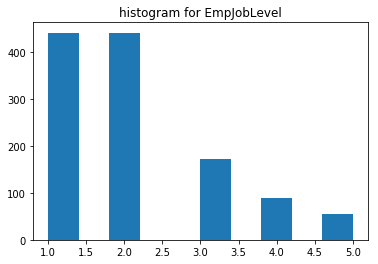

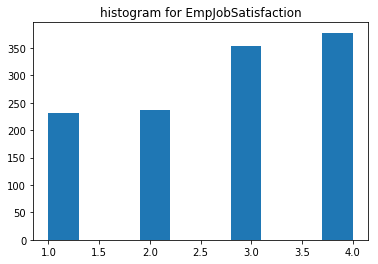

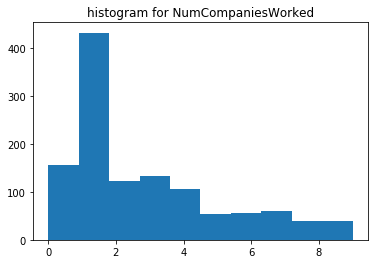

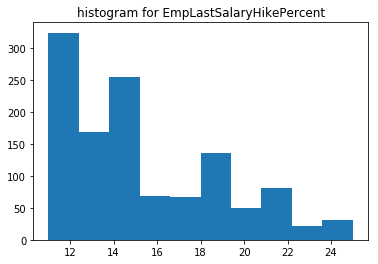

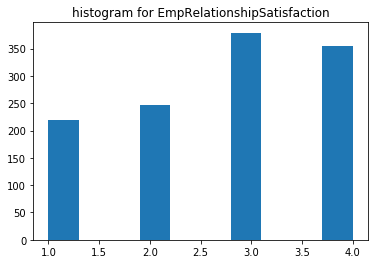

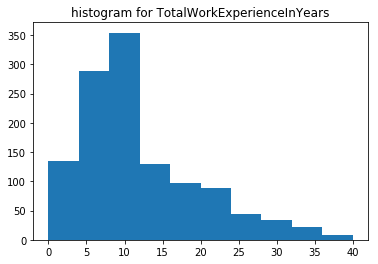

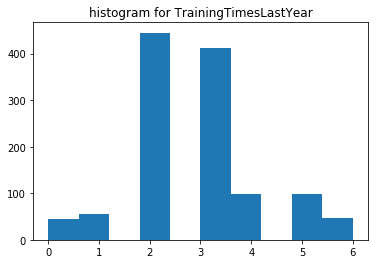

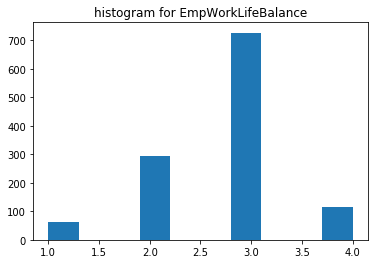

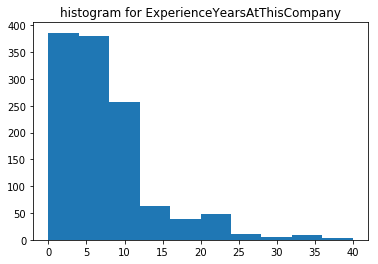

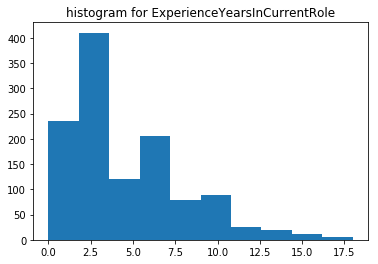

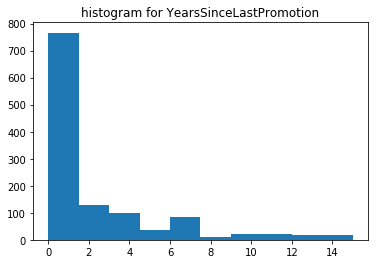

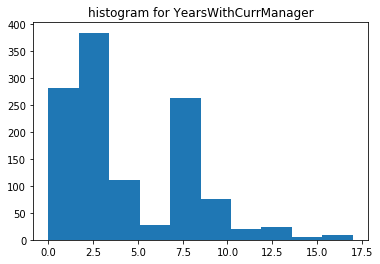

In [29]:
plt.figure(figsize=(5,5))
for i,col in enumerate(num_cols):
    plt.figure(i)
    plt.title("histogram for %s"%col)
    plt.hist(emp[col])

In [43]:
emp.shape

(1200, 28)

In [44]:
#since we have visualized the features, we can drop OverTime1 which we created before. 
emp.drop('OverTime1',1,inplace=True)

In [45]:
emp.shape

(1200, 27)

In [46]:
cat_cols

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [47]:
emp=pd.get_dummies(emp,columns=cat_cols)

In [49]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 62 columns):
Age                                          1200 non-null int64
DistanceFromHome                             1200 non-null int64
EmpEducationLevel                            1200 non-null int64
EmpEnvironmentSatisfaction                   1200 non-null int64
EmpHourlyRate                                1200 non-null int64
EmpJobInvolvement                            1200 non-null int64
EmpJobLevel                                  1200 non-null int64
EmpJobSatisfaction                           1200 non-null int64
NumCompaniesWorked                           1200 non-null int64
EmpLastSalaryHikePercent                     1200 non-null int64
EmpRelationshipSatisfaction                  1200 non-null int64
TotalWorkExperienceInYears                   1200 non-null int64
TrainingTimesLastYear                        1200 non-null int64
EmpWorkLifeBalance                           120

In [196]:
x=emp1.drop('PerformanceRating',axis=1)
y=emp1.PerformanceRating

In [201]:
y.shape

(1200,)

In [202]:
from sklearn.preprocessing import StandardScaler,minmax_scale

In [206]:
scaler=StandardScaler()
x_scale=pd.DataFrame(scaler.fit_transform(x))

In [211]:
x_scale.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,-0.541458,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.889111,...,-0.112509,-0.0766,-0.180838,-0.351562,-0.476439,0.646869,0.645573,-0.645573,0.417335,-0.417335
1,1.109888,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.889111,...,-0.112509,-0.0766,-0.180838,-0.351562,-0.476439,0.646869,0.645573,-0.645573,0.417335,-0.417335
2,0.339260,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.594054,...,-0.112509,-0.0766,-0.180838,-0.351562,2.098906,-1.545908,-1.549010,1.549010,0.417335,-0.417335
3,0.449349,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.061389,...,-0.112509,-0.0766,-0.180838,-0.351562,-0.476439,0.646869,0.645573,-0.645573,0.417335,-0.417335
4,2.541054,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.337297,...,-0.112509,-0.0766,-0.180838,-0.351562,-0.476439,0.646869,0.645573,-0.645573,0.417335,-0.417335


In [ ]:
emp1[emp1.dtypes[(emp1.dtypes=="float64")|(emp1.dtypes=="int64")].index.values]
plt.show()